In [15]:
#参考网站 http://luchi007.iteye.com/blog/2287274

In [12]:
import theano
import numpy as np
from sklearn import datasets
import pylab
import theano.tensor as T

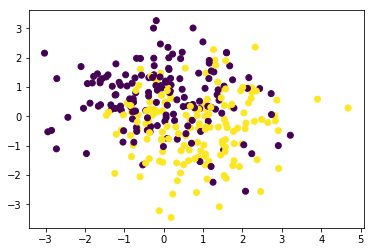

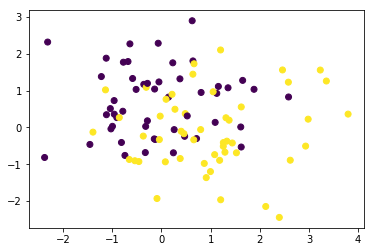

In [13]:
np.random.seed(0)  
train_X, train_y = datasets.make_moons(300, noise=1) #
pylab.scatter(train_X[:,0],train_X[:,1],c=train_y)
pylab.show()
train_X = train_X.astype(np.float32)  
train_y = train_y.astype(np.int32)  
num_example=len(train_X)  


test_X, test_y = datasets.make_moons(100,noise=1)
pylab.scatter(test_X[:,0],test_X[:,1],c=test_y)
pylab.show()
num_test = len(test_X)



In [14]:
#设置参数  
nn_input_dim=2 #输入神经元个数  
nn_output_dim=2 #输出神经元个数  
nn_hdim=100  #隐层节点数

epsilon=0.01 #learning rate  
reg_lambda=0.01 #正则化长度  

In [15]:
#参数初始化，设置为shared加速计算
w1=theano.shared(np.random.randn(nn_input_dim,nn_hdim),name="W1")  
b1=theano.shared(np.zeros(nn_hdim),name="b1")  
w2=theano.shared(np.random.randn(nn_hdim,nn_output_dim),name="W2")  
b2=theano.shared(np.zeros(nn_output_dim),name="b2")  


In [16]:
#前馈算法  
X=T.matrix('X')  #double类型的矩阵 
y=T.lvector('y') #int64类型的向量  
z1=X.dot(w1)+b1   #1 输入和w1的加权和
a1=T.tanh(z1)     #2 激活函数
z2=a1.dot(w2)+b2  #3 隐层输出和w2的加权和  
y_hat=T.nnet.softmax(z2) #4 激活函数  

#正则化项  
loss_reg=1./num_example * reg_lambda/2 * (T.sum(T.square(w1))+T.sum(T.square(w2))) #5  
loss=T.nnet.categorical_crossentropy(y_hat,y).mean()+loss_reg  #6  
#预测结果  
prediction=T.argmax(y_hat,axis=1) #7  






In [17]:
forword_prop=theano.function([X],y_hat)  
calculate_loss=theano.function([X,y],loss)  
predict=theano.function([X],prediction)  




In [18]:
#求导  
dw2=T.grad(loss,w2)  
db2=T.grad(loss,b2)  
dw1=T.grad(loss,w1)  
db1=T.grad(loss,b1)  
  
#更新值  
gradient_step=theano.function(  
    [X,y],  
    updates=(  
        (w2,w2-epsilon*dw2),  
        (b2,b2-epsilon*db2),  
        (w1,w1-epsilon*dw1),  
        (b1,b1-epsilon*db1)  
  
    )  
)  

In [21]:
def build_model(num_passes=20000,print_loss=False):  
  
    w1.set_value(np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim))  
    b1.set_value(np.zeros(nn_hdim))  
    w2.set_value(np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim))  
    b2.set_value(np.zeros(nn_output_dim))  
  
    for i in range(0,num_passes):  
        gradient_step(train_X,train_y)  
        if print_loss and i%1000==0:  
            print("Loss after iteration %i: %f"%(i,calculate_loss(train_X,train_y)))  
            

In [22]:
build_model(print_loss=True)

Loss after iteration 0: 1.248376
Loss after iteration 1000: 0.556775
Loss after iteration 2000: 0.552553
Loss after iteration 3000: 0.549295
Loss after iteration 4000: 0.546417
Loss after iteration 5000: 0.543768
Loss after iteration 6000: 0.541294
Loss after iteration 7000: 0.538972
Loss after iteration 8000: 0.536790
Loss after iteration 9000: 0.534737
Loss after iteration 10000: 0.532805
Loss after iteration 11000: 0.530985
Loss after iteration 12000: 0.529269
Loss after iteration 13000: 0.527652
Loss after iteration 14000: 0.526129
Loss after iteration 15000: 0.524696
Loss after iteration 16000: 0.523351
Loss after iteration 17000: 0.522089
Loss after iteration 18000: 0.520906
Loss after iteration 19000: 0.519798


In [97]:
error_num = 0

temp_y = predict(test_X)

for i in range(0,num_test):
    if(temp_y[i] != test_y[i]):
        error_num = error_num+1
        





        
        
    